In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
import tables
import h5py

#!jt -t onedork -cellw 100%

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=1
vscal=5
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

1600000 bytes
[[2.         2.00535521 2.01074412 ... 4.14842007 4.14842007 4.14842007]
 [1.99946617 2.004818   2.01020354 ... 4.14842007 4.14842007 4.14842007]
 [1.99893233 2.00428079 2.00966296 ... 4.14842007 4.14842007 4.14842007]
 ...
 [1.94821817 1.95323208 1.95828027 ... 4.14842006 4.14842006 4.14842006]
 [1.94768433 1.95269458 1.95773911 ... 4.14842006 4.14842006 4.14842006]
 [1.9471505  1.95215708 1.95719794 ... 4.14842006 4.14842006 4.14842006]]
0.0
[2.02162267 2.02107539 2.0205281  2.01998079 2.01943347 2.01888614
 2.0183388  2.01779144 2.01724408 2.0166967  2.01614931 2.0156019
 2.01505449 2.01450706 2.01395962 2.01341216 2.0128647  2.01231722
 2.01176973 2.01122223 2.01067472 2.01012719 2.00957965 2.0090321
 2.00848454 2.00793696 2.00738938 2.00684178 2.00629417 2.00574654
 2.00519891 2.00465126 2.0041036  2.00355592 2.00300824 2.00246054
 2.00191283 2.00136511 2.00081737 2.00026963 1.99972187 1.9991741
 1.99862632 1.99807852 1.99753071 1.99698289 1.99643506 1.99588722
 1.99

In [5]:
print(rnputil)

M=massnp[0,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print(rminus,rplus,rcosm)


['1000000' '100' '10000' '2.0' '0.053383333333333324' '1.0' '0.98' '0.1'
 'True' '0.0' 'edd']
N=1000000
0.7727479281957472 1.4178514651566756 4.148420119024591


In [6]:
uval=0

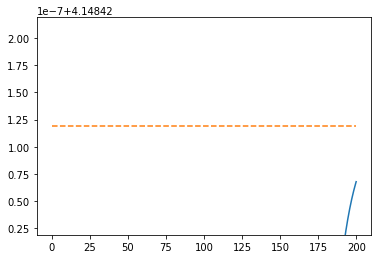

In [7]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
plt.ylim(rcosm-.0000001,rcosm+.0000001)
plt.show()

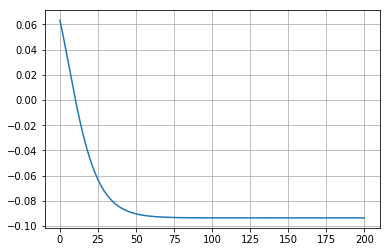

In [8]:
plt.plot(vrange,dsignpv[uval])
#plt.yscale('log')
#plt.ylim(-.11,-.09)
plt.grid()
plt.show()

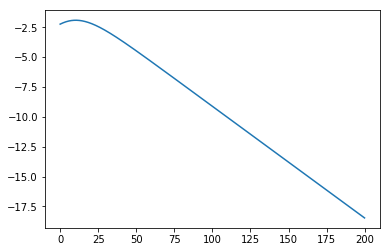

In [9]:
plt.plot(vrange,signp[uval])
plt.show()

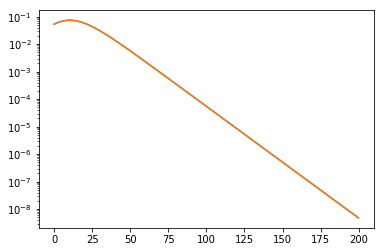

In [10]:
plt.plot(vrange,np.abs(drnpu[uval]))
plt.plot(vrange,drnpv[uval])
plt.yscale('log')
plt.show()

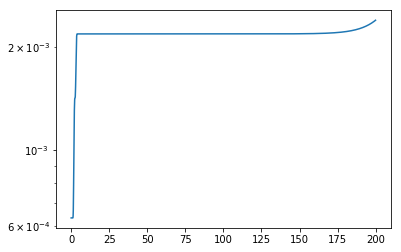

In [11]:
plt.plot(vrange,np.abs((np.abs(drnpu[uval])-drnpv[uval])/drnpv[uval]))
plt.yscale('log')
plt.show()

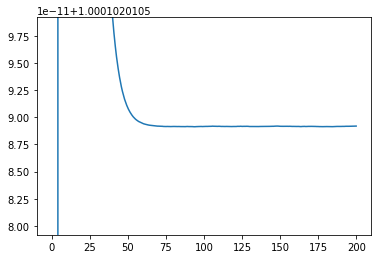

In [12]:
plt.plot(vrange,massnp[uval])
plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.show()

In [13]:
print(Nu,Nu,Nu)

100 100 100


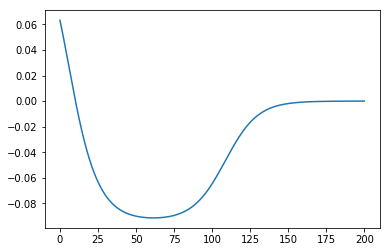

[ 6.32432681e-02  6.26912112e-02  6.21361265e-02 ... -1.85837151e-05
 -1.84107149e-05 -1.82393249e-05]


In [14]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

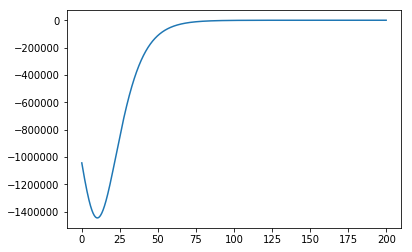

[-1.04256935e+06 -1.04916482e+06 -1.05574354e+06 ... -9.54029847e-02
 -9.45146810e-02 -9.36346484e-02]


In [15]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

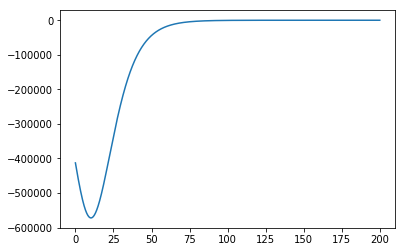

[-1.04256935e+06 -1.04916482e+06 -1.05574354e+06 ... -9.54029847e-02
 -9.45146810e-02 -9.36346484e-02]


In [16]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
print(dsignpv2)

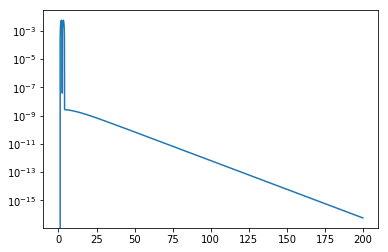

In [17]:
plt.plot(vrange,np.abs(dphinpv[0]))
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()

In [18]:
print(1.0,.5*(1-2*massnp[0,0]/rnp[0,0]+Q**2.0/rnp[0,0]**2.0-Lambda*rnp[0,0]**2.0/3))

1.0 0.053383333333333324
